# ECS7024 Statistics for Artificial Intelligence and Data Science

This notebook is not assessed but aims to help you understand some key concepts.


## Notebook 3: Aims and Outline¶
The aim of this notebook is to use simulation to explore the issue of sampling. Note that we do not load a dataset; instead, the data we need is generated randomly. The two distribution we have encountered already (normal and binomial) are used and a new distribution is also introduced. Additionally, the notebook has some details on plotting. 

 1. Section 1: Plotting and Simulation of Binomial Distribution
      1. Plotting a Binomial
      1. Random Samples from a Binomial
      1. Distribution of the Sample Mean 
      1. Relationship to a Normal 
      
 2. Section 2: Plotting and Simulation of a Poisson Distribution
      1. Introducing the Poisson Distribution
      1. Random Samples from a Poisson Distribution
      
 3. Section 3: Plotting and Simulation of a Normal Distribution
      1. Plotting and Sampling from a Normal
      1. Distribution of Sample Statistics
      1. Distribution of the Difference between Sample Means

 4. Section 4: Notes on Plotting 
 

**Notes On Libraries**

As well as the `pandas` library (main concept the `DataFrame`), we use two important libraries:
1.  The `numpy` library underlines `pandas` and it sometimes necessary to use features from it directly. It's main concepts are multi-dimensional array (and matrices) and tools to vectorise calculations on these. As usual, it has a [website](https://numpy.org/) when you can find documentation for any of the functions we use. 

2. The `stats` module of the `scipy` library has implementations of statistical distributions (and more); `scipy` also covers other aspects of scientific computing: as well as the [website](https://scipy.org/scipylib/), the [wikipedia](https://en.wikipedia.org/wiki/SciPy) entry also gives an overview.  

In [1]:
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Plotting and Simulation of Binomial Distribution

### Section 1.1: Plotting the Binomial Distribution

If this section, we use the definition of the binomial distribution (provided in the `scipy.stats` library) to explore the shape of the binomial distribution. Sampling is not done (see the following section).  

The following code uses a wider range of libraries, including `matplotlib`. There are lots of comments to help you adapt the code and, little by little, get a better understanding of it. There is more on plotting in the final section but you are recommended to review that later.

Recall that the *binomial distribution* is a family of distribution. The distribution you want depends on:
 * How many trials you have. For example, how many times you flip the coin. This is parameter `n`.
 * What the probability of success is. For example, for a fair coin it is 50%. This is parameter `p`.

**Note on string formatting**: The code below uses 'old fashioned' Python string formatting, one of several methods offered by Python to create formatted strings. [Read more in the documentation](https://docs.python.org/3/library/stdtypes.html#old-string-formatting) (if you wish). 

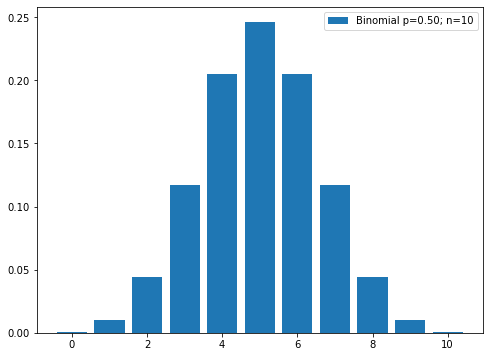

In [2]:
trials_n = 10    # the number of trials; change this
success_p = 0.5  # success probability - change this

fig, ax = plt.subplots(1, 1, figsize=(8,6))  # create a 1 by 1 plot with the given size (try changing this)
  # fig is the 'figure' - we do not often need this
  # ax is an axis; we plot on this and the figure can have many

d1 = stats.binom(trials_n, success_p) # create the distribution from the binom family with the given parameters
xs = np.arange(0, trials_n+1)   # the possible outcome values, from 0 to n

# Plot the outcomes against the Probability Mass Function (pmf) of the distribution
# We write a clear label (for the plot legend) using the parameters. 
#   The program still runs if you omit this (very important) information (see notes above)
ax.bar(xs, d1.pmf(xs), label='Binomial p=%3.2f; n=%d' % (success_p, trials_n))
ax.legend() # This makes the legend appear

#### Exercise 1.1 Change the Parameters

 1. The probability of rolling a 6 with a dice. Create the probability distribution of 8 rolls. Estimate the probability of getting **at least** six 6s.
 2. Review the skew of the distribution, with p=0.1, p=0.5 and p=0.9, all with 10 trials.
 2. Vary the number of trials from fewer than 10, up to a large number with p = 0.5
 4. Replace the `.pmf` (probability Mass Function) with the Cumulative Density Function `.cdf`, whichbshows the cumulative frequencies. Use to check your estimate from the first item above.

#### Limiting the Outcomes Range in the Plot

Where the number of trials (n) is very large (such as 500) the outcome space is from 0 to 500. However, these extreme outcomes are very unlikely and make it hard to see the plot. The code below shows how to limit the x axis to values that account for almost all the probability.

In [3]:
trials_n = 500
success_p = 0.5

d2 = stats.binom(trials_n, success_p)        # create the distribution 

# The Percent Point Function (ppf) is an inverse of the (cumulative) probability. 
# So d.ppf(0.01) gives the outcome value (on the x axis) where the probability to the left is no more than 1% 
xs = np.arange(d2.ppf(0.001), d2.ppf(0.999))  # the possible outcome values, from 0 to n, but only include some

#fig, ax = plt.subplots(1, 1, figsize=(8,6))  # create a 1 by 1 plot 
# Plot the outcomes against the Probability Mass Function (pmf) of the distribution
#ax.bar(xs, d2.pmf(xs), label='Binomial p=%3.2f; n=%d' % (success_p, trials_n))
#ax.legend() 

#### Exercise 1.2 Large Number of Trials

You will have seen that the distribution is skewed when n=10 and p is small (e.g. 0.1). Plot the distribution for a large n and small p (for example n=1000 and p=0.05, or n=10000 and p=0.005). What happens to the skew? Can you explain this?

#### Exercise 1.3 Table of Means and Standard Deviations
The following code generates a table of means and standard deviations for varying the success probability. 

1. Add more success probabilities to the table. Review the values against the formulae for the means and standard deviation.
2. Allow the number of trials in the table to value. You will need to add another column and have two variables in the list comprehension

For `binom(n,p)` the mean is $n.p$ and the standard deviation is $\sqrt{n.p.(1-p)}$.

In [4]:
trials_n = 10
ps = [0.1, 0.5, 0.9]

means = [stats.binom.mean(trials_n, p) for p in ps] # this a Python list comprehension (see alternative)
stds = [stats.binom.std(trials_n, p) for p in ps] 

# alternative code, avoiding a list comprehension (also showing what it means)
#means = []
#for p in ps:
#    means.append(stats.binom.mean(trials_n, p))

stats_table = pd.DataFrame({'Probability':ps, 'Mean':means, 'Std Dev':stds})
#stats_table

### Section 1.2: Random Samples from a Binomial Distribution

In this section, we draw samples from the binomial distribution. We distinguish carefully between the distribution itself and the distribution of samples.

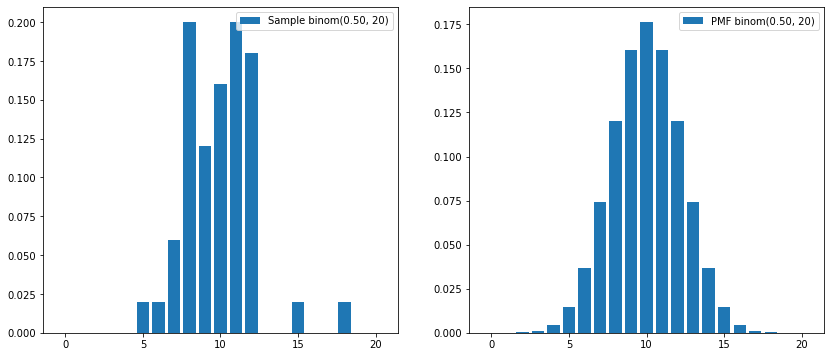

In [5]:
trials_n = 20
success_p = 0.5

d3 = stats.binom(trials_n, success_p) # create the distribution 

xs = np.arange(0, trials_n+1)         # outcome values

sample_N = 50                         # the number of samples
samples = d3.rvs(size=sample_N)       # generate random samples - each is a number
                                      # random: changes each time you run the program

counts = [sum(samples == x)/sample_N 
          for x in xs]                # generate the counts of each x value, divided by the number of samples

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))  # create a 1 by 2 plot 

# Plot the counts of each value in the sample
ax1.bar(xs, counts, label = 'Sample binom(%3.2f, %d)' % (success_p, trials_n))
ax1.legend() 

# For comparison, plot the outcomes against the PMF of the same distribution
ax2.bar(xs, d3.pmf(xs), label='PMF binom(%3.2f, %d)' % (success_p, trials_n))
ax2.legend()

#### Exercise 1.3 Samples

1. Describe the relationship between the sample and the PMF. The two plots are (also certainly) different. Does this mean one is wrong?
2. The code contains a variable `sample_N`. Explain what this is: in particular, be sure that you clearly understand how it differs from the number of trials `trials_n`. 
3. Look at the effect of changing `sample_N` from 10 in steps up to a much large value. What happens to the relationship between the two plots? Can you explain this?

### Section 1.3: Distribution of the Sample Mean
When we sample (for example 50 values) from a distribution, we can calculate the sample mean and other statistics such as the standard deviation. 
* The sample mean is our estimate of the mean of the distribution we are sampling from.
* How close is the sample mean to the mean of the distribution? We can examine this by plotting the distribution of the sample means we get when we repeat the experiment many times.

We now have 
 * The parameters of the binomial, the number of trials (n) and the success probability (p)
 * the number of samples we take from this distribution
 * The number of times we repeat the sampling

The code below is a little complex! Focus on what it does (rather than exactly how). 

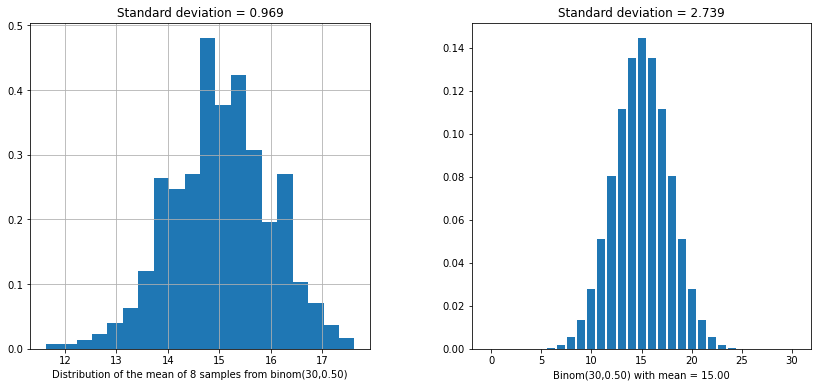

In [6]:
trials_n = 30
success_p = 0.5
sample_N = 8     # the number of samples
repeat_N = 1000  # number of times sampling repeated

xs = np.arange(0, trials_n+1)         # outcome values

many_samples = stats.binom.rvs(trials_n, success_p, size=(repeat_N, sample_N))
many_means = [s.mean() for s in many_samples]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))  # create a 1 by 2 plot 

# Plot the histogram of the means 
df = pd.DataFrame({'M':many_means})
df.hist(ax=ax1, bins=20, density=True)
ax1.set_title('Standard deviation = %4.3f' % df.std())

# For comparison, plot the outcomes against the PMF of the same distribution
ax2.bar(xs, stats.binom(trials_n, success_p).pmf(xs))
ax2.set_title('Standard deviation = %4.3f' % stats.binom(trials_n, success_p).std())

# Show what is happening 
ax1.set_xlabel('Distribution of the mean of %d samples from binom(%d,%3.2f)' % (sample_N, trials_n, success_p))
_ = ax2.set_xlabel('Binom(%d,%3.2f) with mean = %3.2f' % (trials_n, success_p, success_p * trials_n))

#### Exercise 1.4

1. Use the code above to explore the relationship between: 
  * The width of the distribution of the sample mean, and
  * The number of samples. What happens when the number of samples increases by a factor of 4?
1. Check you understand the difference between two deviations:
  * On the right: the standard deviation is determined by the 'n' and 'p'
  * On the left: the width of the distribution of the sample mean. (It is called the 'standard error'). It depends on the number of samples.
  
For completeness, note that the 'standard error' also depends on the standard deviation of the distribution being sampled. This is best explored using the normal distribution.

### Section 1.4 Relationship to the Normal

#### Exercise 1.5
Do some experiments to explore under what conditions the following look nearly normal:

1. The binomial distribution, when `p` is small (e.g. `0.01`).
2. The distribution of the sample mean of samples from a binomial with a noticeable skew.

## Section 2: Plotting and Simulation of a Poisson Distribution

### Section 2.1: Introducing the Poisson Distribution

Suppose that a hospital looks over records of the number of emergency patients admitted on mid-week days in the winter over a period. They find that on average the rate of admissions is 8.5 patients per day. The number admitted on any day is an integer (never 8.5, even in the worst emergency!). The number could be any number from 0 upwards with no maximum (unlike the Binomial distribution, where the maximum is the number of trials).

The distribution of the number of patients admitted in a day is called a Poisson Distribution. It has a single parameter, the rate (often written as $\lambda$ which is the Greek letter 'lambda', but beware as `lambda` is a reserved word in Python). 

This is a very simple scenario. In practice the rate varies, with factors such as the weather, the time of year, local events, holidays and more.

**Some Properties of the Poisson Distribution**

The mean ($\mu$) and variance (remember this is $\sigma^2$) have a very simple relationship to the rate parameter:

$$
\mu = \sigma^2 = \lambda
$$

The distribution has a positive skew, which is decreases as the rate increases. 

#### Exercise 2.1 Use the code below to display the distribution for different rates.

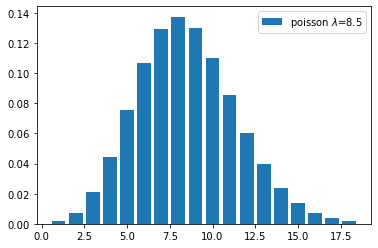

In [7]:
rate = 8.5
x = np.arange(stats.poisson.ppf(0.001, rate), stats.poisson.ppf(0.999, rate))

fig, ax = plt.subplots(1, 1)
ax.bar(x, stats.poisson.pmf(x, rate), label=r'poisson $\lambda$=%3.1f' % rate)
ax.legend()

#### Exercise 2.2 Using the Poisson Distribution

1. Given an average rate of 8.5 patients per day, the hospital's management wonder how large the emergency service should be. They propose to allow for a maximum of 10 patients in a day. (We will assume that all patients can be dealt with in a day; the reality is more complex.) From the plot above estimate the proportion of days when the number of admissions will be larger than 10.

2. Rather than estimating the answer to the previous question using a plot of the Probability Mass Function, we can calculate it using the Cumulative Density Function (cdf). For example, `stats.poisson.cdf(10, rate)` gives the probability of all the possible admissions from zero up to and including 10. Use this to calculate of more that 10 admissions in a day. (You can plot the cdf as well if you wish.)

3. Find the maximum number that need to be allowed for so that this number is exceeded on fewer than 5% of days. (You can do this by trial and error). 

### Section 2.2: Random Samples from a Poisson Distribution

The code below is similar to that in Section 1.3 above. It shows the distribution of the sample mean when samples of different sizes are repeatedly taken from a Poisson distribution with a given rate.

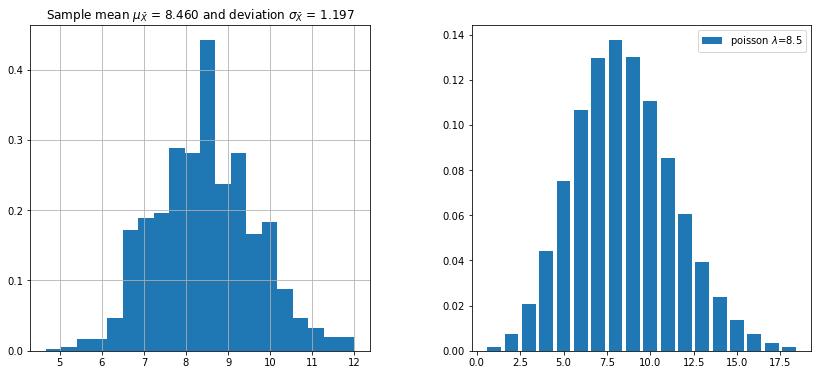

In [8]:
rate = 8.5
sample_N = 6    # the number of samples
repeat_N = 1000  # number of times sampling repeated

x = np.arange(stats.poisson.ppf(0.001, rate), stats.poisson.ppf(0.999, rate))

many_samples = stats.poisson.rvs(rate, size=(repeat_N, sample_N))
many_means = [s.mean() for s in many_samples]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))  # create a 1 by 2 plot 

# Plot the histogram of the means 
df = pd.DataFrame({'M':many_means})
df.hist(ax=ax1, bins=20, density=True)
ax1.set_title(r'Sample mean $\mu_{\bar{X}}$ = %4.3f and deviation $\sigma_{\bar{X}}$ = %4.3f' % (df.mean(), df.std()))

ax2.bar(x, stats.poisson.pmf(x, rate), label=r'poisson $\lambda$=%3.1f' % rate)
ax2.legend()

#### Exercise 2.3

1. The plot of the distribution of the sample means also shows the mean and the standard deviation of the sample mean (called the 'standard error' of the estimate). Even with a very small sample (e.g. 6), the mean of the samples is close to actual mean (remember the mean is equal to the rate). However, with only a single sample, the likely estimate of the mean depends on the width of the distribution. One approach is to say that the true mean is in the range +/- twice the deviation. What is this range when the sample size is 6? *Note that here we have found the standard error by simulating 1000 samples. We will need another way to do this when we only have single sample.*

2. We want to reduce the range to less than 1 (so that the deviation needs to be below 0.25). Find a (round) number for the sample size to achieve this.

## Section 3: Plotting and Simulation of a Normal Distribution
In this section we adapt the code above to explore the behaviour of samples from the normal distribution.

### Section 3.1: Plotting and Sampling from a Normal
The code below shows how to plot the normal distribution. There are two significant changes to the code above, both needed because the normal is a continuous distribution:
1. We have a Probability Density Function (pdf) rather than a pmf. 
2. We use a `plot` rather than a bar chart.


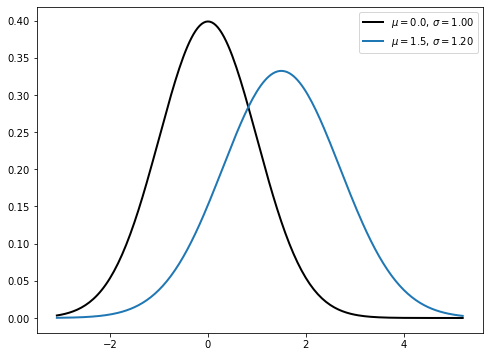

In [9]:
# First normal distribution
mean1 = 0
std1 = 1 
nm1 = stats.norm(loc=mean1, scale=std1)

# Second standard deviation
mean2 = 1.5
std2 = 1.2
nm2 = stats.norm(loc=mean2, scale=std2)

xs = np.linspace(nm1.ppf(0.001), nm2.ppf(0.999), 200) # 200 is the number of evenly-spaced points in the range
# adjust this by using the PPF of the distribution on your plot that extends furthest

fig, ax = plt.subplots(1, 1, figsize=(8,6)) 

# Plot the normal using the PDF (probability density function)
ax.plot(xs, nm1.pdf(xs), 'k-', lw=2, label='$\mu=$%3.1f, $\sigma=$%4.2f' % (nm1.mean(), math.sqrt(nm1.var())))
ax.plot(xs, nm2.pdf(xs), lw=2, label='$\mu=$%3.1f, $\sigma=$%4.2f' % (nm2.mean(), math.sqrt(nm2.var())))

ax.legend() 

#### Exercise 3.1 

1. Add a wider range of normal distributions.
2. Plot the `cdf` as well as (or instead of) the `pdf`.

The code below shows how to plot one sample from a normal distribution. We can use a histogram to plot the sample data. 

#### Exercise 3.2
1. Run the code multiple times, looking at the variation in the two sample statistics. Which varies most?
2. Repeat with smaller and large sample sizes.

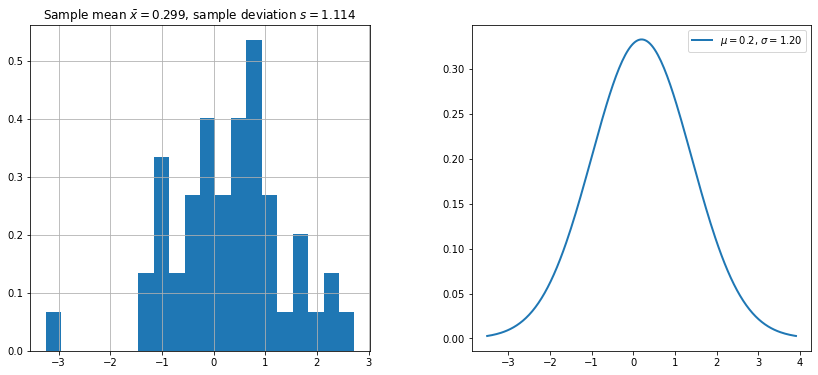

In [10]:
sample_N = 50     # the number of samples

# Normal distribution
mean3 = 1/5
std3 = 1.2

xs = np.linspace(stats.norm(loc=mean3, scale=std3).ppf(0.001), 
                 stats.norm(loc=mean3, scale=std3).ppf(0.999), 200) 

many_samples = stats.norm.rvs(loc=mean3, scale=std3, size=sample_N)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))  # create a 1 by 2 plot 

# Plot the histogram of the sample
df = pd.DataFrame({'S':many_samples})
df.hist(ax=ax1, bins=20, density=True)
ax1.set_title(r'Sample mean $\bar{x} = %4.3f$, sample deviation $s = %4.3f$' % (df.mean(), df.std()))

# For comparison, plot the normal we have sampled from
ax2.plot(xs, stats.norm(loc=mean3, scale=std3).pdf(xs), lw=2, 
         label='$\mu=$%3.1f, $\sigma=$%4.2f' % 
         (stats.norm(loc=mean3, scale=std3).mean(), stats.norm(loc=mean3, scale=std3).std()))
ax2.legend()


### Section 3.2: Distribution of Sample Statistics

#### Exercise 3.3 
1. Adapt the code from section 2.2 to plot the distribution of the mean of many samples. 
2. Also try to plot the distribution of the sample standard deviation (which is the estimate of the standard deviation). This shows the distribution of the standard deviation of the samples and should not be confused with the standard error.


### Section 3.3: Distribution of the Difference between Sample Means

#### Exercise 3.4 (More Challenging)
We have two cohorts of students, one taught online and the other in a more old fashioned way. We are interested in whether they have performed differently. We assume (without offering any reasons) that both cohorts have a normal distribution of marks and also that we can treat the two cohorts (which are of equal size) as samples from a large population of actual (or even potential) students. *Note that marks are using in a bounded range such as 0-100 whereas a normal distribution ranges over +/- infinity. We can ignore this: exam marks are just an illustrative scenario. In reality, the distribution of exams marks is seldom symmetric and can be bi-modal.*

To simulate this situation:
1. Choose normal distributions for the two population, with different means and standard deviations. To start with ensure that the two distributions are at least as separated as the pair shown in section 3.1 above.
2. Choose a sample size (say 30) and repeatedly (say 1000 times) sample and calculate the sample means. Do this once for each distribution, putting the data in a DataFrame, with one column 'online' and the other 'oncampus' so that there are 1000 rows.
3. Then add a column of differences, using code like `df.assign(diff = df.online - df.oncampus)`.
4. Now plot the distribution of the differences. 

How much of the distribution crosses the zero difference? If there is a significant area on either side of zero this shows that the sample might not get the 'answer' that you assumed in your choice of normal distributions. How do you expect this to relate to:
* The separation between the distributions
* The size of the sample


## Section 4: Short Guide to Plotting

The pandas library has a plot function which often does what we want. However, to really understand what is happening and to be able to do more, we need to look at matplotlib which actually provides the pandas plotting. This section gives a very brief overview. For more, see the [matplotlib tutorials](https://matplotlib.org/3.1.0/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

**Warning** Anything is possible with matplotlib but it can waste huge amounts of time. Do not tell too absorbed by the perfect plot.

### Figures and Axes
A figure can contain several plot. Each plot is plotted on an `axis`. Axis have text including labels, titles and legends. The pandas dataframe plot function automatically creates one (or more) axes, but you can also use it to plot on an existing axis.

### Example 1
This examples shows two ways to plot bar charts, first directly in matplotlib and then using the `plot` method of a dataframe.

<AxesSubplot:xlabel='Grade'>

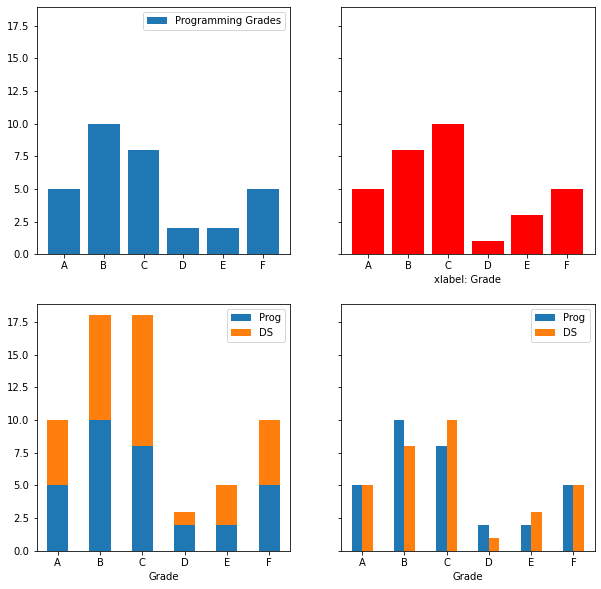

In [11]:
# some dummy data
df1 = pd.DataFrame({'Grade':['A','B','C','D','E','F'], 'Prog':[5,10,8,2,2,5], 'DS':[5,8,10,1,3,5]})

# create a fig of 4 (2 x 2) axes. Note that the axes returned as tuples or lists
fig, ((a11,a12),(a21,a22)) = plt.subplots(2, 2, figsize=(10,10), sharey=True)

# note 'sharey' causes all the plots to have the same vertical scale; try without

# alternative way to return the axes
#fig, axs = plt.subplots(2, 2, figsize=(10,10), sharey=True)
#a11 = axs[0,0]
#a12 = axs[0,1]
#a21 = axs[1,0]
#a22 = axs[1,1]

# plots counts (y) or grades (x)
a11.bar(df1.Grade, df1.Prog, label='Programming Grades')
a11.legend() # this shows the legend; the next axis does not do this

a12.bar(df1.Grade, df1.DS, color='red', label='DS Grades')
a12.set_xlabel('xlabel: Grade') # this labels the horizontal scale of the axis

# use the dataframe plot function to show the same data - stacked
df1.plot(kind='bar', x='Grade', ax=a21, stacked=True, rot=0)

df1.plot(kind='bar', x='Grade', ax=a22, rot=0)

### Example 2

This example shows a range of ways to plot continuous data, using histograms, densities and scatter plots

Text(0.5, 1.0, 'This plot uses the Seaborn library')

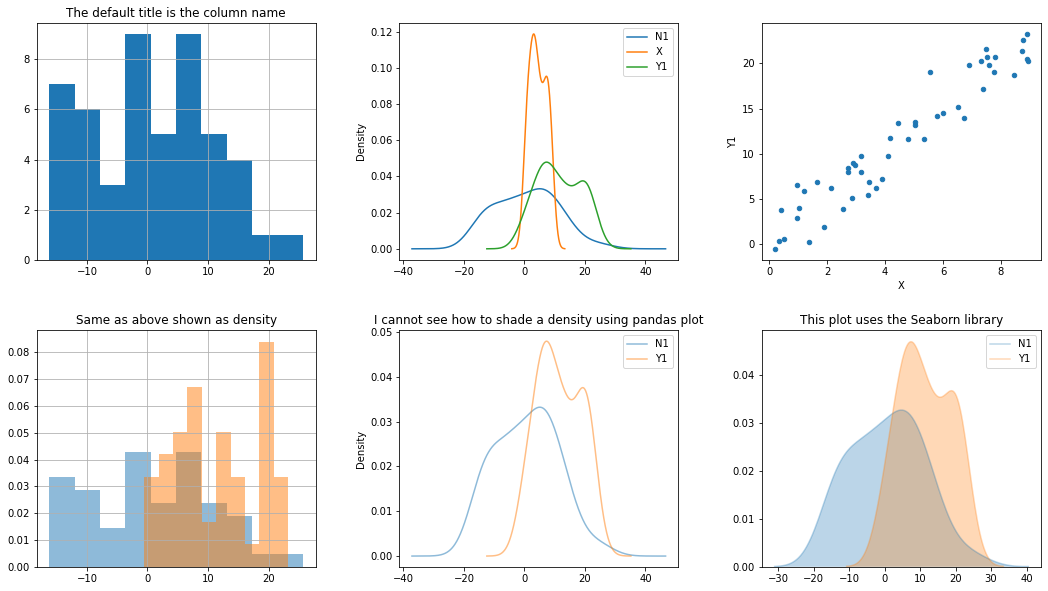

In [12]:
# generate some dummy data
rn1 = stats.norm.rvs(size=50)          # standard normal 
xs = np.random.random_sample(50) * 10  # uniform sample * 10
ys1 = (xs * 2.5) + rn1 * 2             # regression line with noise
dummy = pd.DataFrame({'N1' : rn1 * 10, 'X': xs, 'Y1':ys1})

fig, ((a11,a12,a13),(a21,a22,a23)) = plt.subplots(2, 3, figsize=(18,10))

# plot a histogram of counts. Note that the histogram is not done with .plot
dummy.hist(ax=a11, column=['N1'])
a11.set_title('The default title is the column name')

# this is a pandas KDE, but I cannot see how to shade it
dummy.plot(ax=a12, kind='kde')

# this is a scatter
dummy.plot(ax=a13, kind='scatter', x='X', y='Y1', legend=True)

# the column argument allow a column of the dataframe to be selected 
dummy.hist(ax=a21, column=['N1'], alpha=0.5, density=True) # alpha makes it transparent, so you have overlay two
dummy.hist(ax=a21, column=['Y1'], alpha=0.5, density=True)
a21.set_title('Same as above shown as density')

# there is no column argument for plot, so select the data first
dummy.loc[:,['N1','Y1']].plot(ax=a22, kind='kde', alpha=0.5)
a22.set_title('I cannot see how to shade a density using pandas plot')

import seaborn as sns
sns.kdeplot(dummy.N1, ax=a23, alpha=0.3, shade=True)
sns.kdeplot(dummy.Y1, ax=a23, alpha=0.3, shade=True)
a23.set_title('This plot uses the Seaborn library')
